In [1]:
import RNA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display

from collections import Counter
from collections import defaultdict
import subprocess
import difflib
import sys
import os
import random
import string
import time

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append('../')
from pretty_print_path import print_moves
import findpath_librna
import findpath


In [2]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) # no scientific notation

# import feature_generation
from features import ij_distance, new_move_dist, plt_moves, config_distance, balance_in_all_things, return_shift_moves
from process_features import fp_call, find_moves, process

## tf part

## tf regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


input_file = "dataset_100_large_train.csv"

dataframe = pd.read_csv(input_file, index_col=0)
# dataframe['target'] = np.where(dataframe["3"]==1, 1, 0)


dataframe = dataframe.drop(labels="s", axis=1)
dataframe = dataframe.drop(labels="sequence", axis=1)
dataframe = dataframe.drop(labels="s2", axis=1)
dataframe = dataframe.drop(labels="i", axis=1)
dataframe = dataframe.drop(labels="j", axis=1)


# dataframe = dataframe.drop(labels="en", axis=1)
# dataframe = dataframe.drop(labels="i_value", axis=1)
# dataframe = dataframe.drop(labels="j_value", axis=1)


train_dataset = dataframe.sample(frac=0.8, random_state=0)
test_dataset = dataframe.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('target')
test_labels = test_features.pop('target')

dataframe

2021-11-19 10:09:58.229160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-19 10:09:58.229176: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


,target,en,labeldiff,i_value,j_value,insert_or_delete,balance,helix_extension
0,0.00000,0.000000,0.000000,0.0378,0.0012,0,0.0,0
1,0.00000,0.035714,0.035714,0.4002,0.1830,0,0.0,0
2,0.25000,0.196429,0.196429,0.2236,0.0190,0,0.0,1
3,0.00000,0.232143,0.017857,0.0378,0.0012,0,0.0,1
4,0.25000,0.321429,0.321429,0.2236,0.0190,0,0.0,1
...,...,...,...,...,...,...,...,...
3461,0.00000,0.211538,0.211538,0.0243,0.0000,1,0.0,1
3462,0.06250,0.423077,0.423077,0.5573,0.2339,0,1.0,1
3463,0.28125,0.557692,0.495192,0.0243,0.0000,1,0.0,0
3464,0.78125,0.865385,0.584135,0.5573,0.2339,0,1.0,1


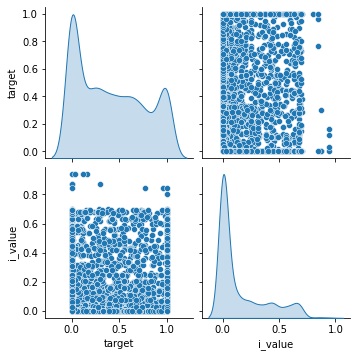

In [4]:
sns.pairplot(dataframe[['target', 'i_value']], diag_kind='kde')

In [5]:
train_features
# train_labels

,en,labeldiff,i_value,j_value,insert_or_delete,balance,helix_extension
2168,0.395604,1.456044e-01,0.4899,0.2500,0,1.0,1
3457,0.714286,2.756892e-01,0.4191,0.0134,0,1.0,0
1374,0.492754,1.836627e-01,0.0001,0.0085,1,0.0,0
1773,0.569231,5.692308e-01,0.0000,0.0000,0,0.0,0
1982,0.671053,2.886997e-01,0.0888,0.0002,0,1.0,1
...,...,...,...,...,...,...,...
2687,0.000000,0.000000e+00,0.4581,0.0007,1,0.0,0
46,0.178571,4.700772e-01,0.0002,0.0000,0,0.0,1
747,0.677778,5.277778e-02,0.0202,0.0000,1,0.0,0
3165,1.000000,1.110223e-16,0.0006,0.0486,0,0.0,0


## linear regression with multiple inputs

## Regression with a deep neural network (DNN)

2021-11-19 10:10:06.155103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-19 10:10:06.155140: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-19 10:10:06.155160: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (minos.tbi.univie.ac.at): /proc/driver/nvidia/version does not exist
2021-11-19 10:10:06.155645: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-19 10:10:06.206582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 7)                 15        
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,680
Trainable params: 17,665
Non-trainable params: 15
_________________________________________________________________
Epoch 1/200
70/70 [==============================] - 1s 3ms/step - loss: 0.2388 - val_loss: 0.1876
Epoch 2/200
70/70 

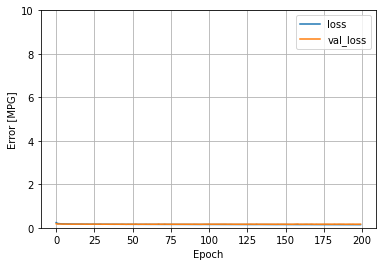

In [6]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      # layers.Dense(50, activation='relu'),
      # layers.Dense(50, activation='relu'),
      layers.Dropout(.2),
      # layers.Dropout(.5),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=200)

plot_loss(history)

In [7]:
dnn_model.evaluate(test_features, test_labels, verbose=0)

0.16794930398464203

## Predictions

2021-11-19 10:10:27.877243: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: dataset_model/assets


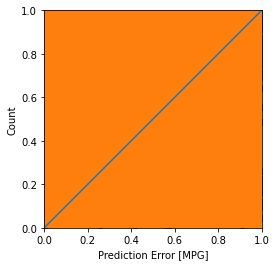

In [8]:
dnn_model.save('dataset_model')

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [9]:
test_predictions = dnn_model.predict(test_features).flatten()

stacked = np.stack([test_labels, test_predictions], axis=1)
df_testoutput = pd.DataFrame(stacked, columns=["labels", "prediction"])
df_testoutput.to_csv("dataset_generation_results.csv")

df_testoutput

,labels,prediction
0,0.000000,-0.023262
1,0.000000,0.274665
2,0.000000,0.194879
3,0.000000,0.000306
4,1.000000,0.193454
...,...,...
688,0.000000,0.469897
689,0.155172,0.589982
690,0.603448,0.576700
691,0.327586,0.729282
